In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import toml

from analysis import prepare_config, prepare_data, make_systematics_table, make_selection_plots, make_signal_plots, make_datamc_plots, make_pureff_table, plot_histogram

plt.style.use('/Users/mueller/Projects/GitRepos/icarusplot/icarus_style.mplstyle')
plt.rcParams.update({'figure.constrained_layout.use': True, 'figure.facecolor': 'white', 'savefig.facecolor': 'white', 'axes.prop_cycle': "cycler('color', ['009E73', 'D55E00', '000000', '0072B2', 'E69F00', 'CC79A7', '56B4E9', 'F0E442',])"})

In [7]:
cfg = prepare_config('configurations/variables.toml', 'configurations/plots.toml', 'configurations/tables.toml', 'configurations/input_files_rev4.toml', 'configurations/systematics.toml')
data = prepare_data(cfg,0)
plots = {f'{plot_name}_{var_name}': dict(**plot_cfg, **var_cfg) for plot_name, plot_cfg in cfg['plots'].items() for var_name, var_cfg in cfg['variables'].items()}

In [34]:
print('Making plots...')
#make_signal_plots(data, cfg)
#make_selection_plots(data, cfg)
#make_datamc_plots(data, cfg)

print('Making tables...')
#make_pureff_table(data, cfg['table_purity_efficiency'])
#make_systematics_table(data, cfg)

Making plots...
Making tables...


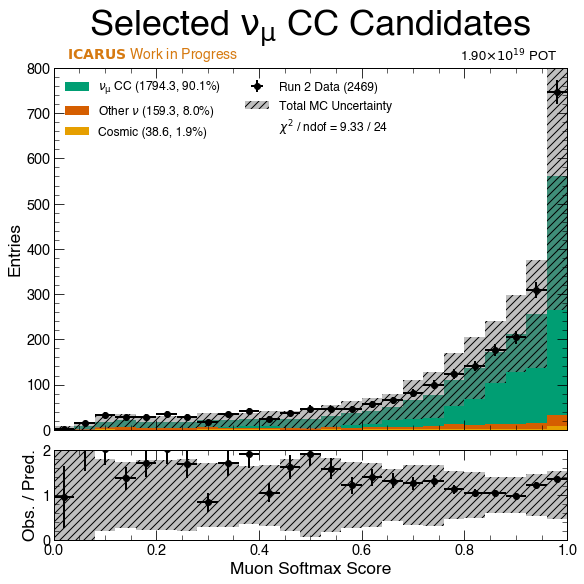

In [3]:
all = {f'{plot_name}_{var_name}': dict(**plot_cfg, **var_cfg) for plot_name, plot_cfg in cfg['plots'].items() for var_name, var_cfg in cfg['variables'].items()}

var = 'muon_softmax'
channel = '1muX'
dir = None

#plot_histogram(data, all[f'signal_hist1d_{channel}_{var}'], cfg['exposure'], dir=dir, release=None, save_path=f'/Users/mueller/Downloads/collonly_signal_hist1d_{channel}_{var}.pdf')

#plot_histogram(data, all[f'selected_hist1d_{channel}_{var}'], cfg['exposure'], dir='reco', release=None, save_path=f'/Users/mueller/Downloads/allplanes_selected_hist1d_{channel}_{var}.pdf')

plot_histogram(data, all[f'datamc_hist1d_{channel}_{var}'], cfg['exposure'], dir=dir, release=None)

[   0  120  240  360  480  600  720  840  960 1080 1200 1320 1440 1560
 1680 1800 1920 2040 2160 2280 2400 2520 2640 2760 2880 3000]
[   0  120  240  360  480  600  720  840  960 1080 1200 1320 1440 1560
 1680 1800 1920 2040 2160 2280 2400 2520 2640 2760 2880 3000]
[   0  120  240  360  480  600  720  840  960 1080 1200 1320 1440 1560
 1680 1800 1920 2040 2160 2280 2400 2520 2640 2760 2880 3000]


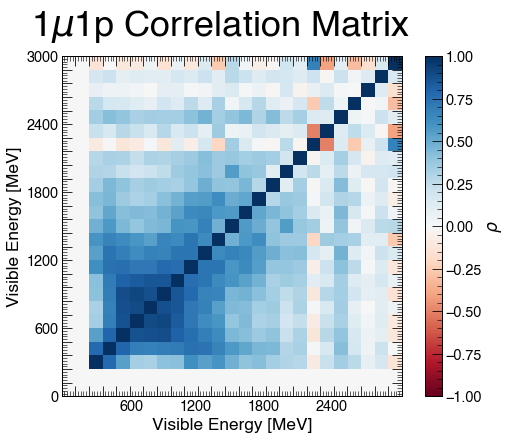

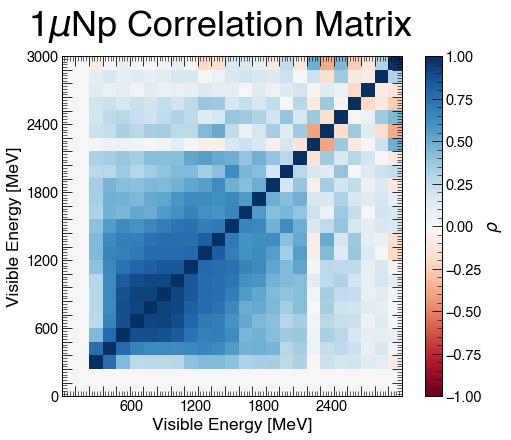

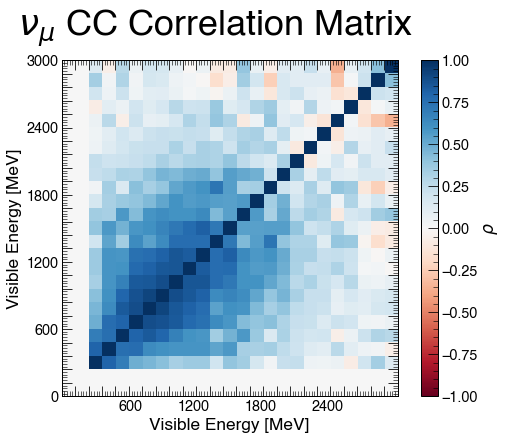

In [ ]:
c = '1mu1p'
var = 'reco_visible_energy'
cov = data[f'systematics_{c}'][f'total_{var}']

def plot_covariance_matrix(data, cfg, save_path=None):
    """
    Plots the covariance matrix as a heatmap using the bin edges
    as labels for the edge of each bin. If the correlation flag is
    set to True, the covariance matrix is normalized to the range
    [-1, 1] and the color scale is adjusted accordingly.

    Parameters
    ----------
    data: dict
        The dictionary containing the covariance matrix.
    cfg: dict
        The dictionary containing the configuration parameters.
    save_path: str
        The path to save the plot to.

    Returns
    -------
    None.
    """
    plt.style.use('/Users/mueller/Projects/GitRepos/icarus_numu_ml_selection/plotting/plot_style.mplstyle')
    figure = plt.figure(figsize=(8, 6))
    ax = figure.add_subplot()
    bin_edges = np.arange(cfg['bins'][2]+1, step=(cfg['bins'][2] - cfg['bins'][1]) / cfg['bins'][0], dtype=int)
    print(bin_edges)

    cov = data[f'systematics_{cfg["channel"]}'][f'total_reco_{cfg["var"]}']
    if cfg['correlation']:
        norm = np.outer(np.sqrt(np.diag(cov)), np.sqrt(np.diag(cov)))
        cov = np.divide(cov, norm, where=norm!=0, out=np.zeros_like(cov))
        im = ax.imshow(cov, cmap='RdBu', vmin=-1, vmax=1, extent=[0, len(bin_edges)-1, len(bin_edges)-1, 0], origin='lower')
    else:
        im = ax.imshow(cov, cmap='BuGn', extent=[0, len(bin_edges)-1, len(bin_edges)-1, 0], origin='lower')
    ax.set_xticks(np.arange(len(bin_edges)))
    ax.set_yticks(np.arange(len(bin_edges)))
    ax.set_xticklabels([str(x-bin_edges[1]) if (xi % 5 == 1 and xi != 1) or xi==len(bin_edges) else '' for xi, x in enumerate(bin_edges)])
    ax.set_yticklabels([str(x) if xi % 5 == 0 else '' for xi, x in enumerate(bin_edges[::-1])])
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")
    plt.colorbar(im, ax=ax, label='Covariance' if not cfg['correlation'] else '$\\rho$')
    ax.set_xlabel(cfg['xlabel'])
    ax.set_ylabel(cfg['xlabel'])
    labels = {'1mu1p': '1$\mu$1p', '1muNp': '1$\mu$Np', '1muX': '$\\nu_\mu$ CC'}
    figure.suptitle(f'{labels[cfg["channel"]]} Correlation Matrix')
    if save_path is not None:
        plt.savefig(save_path)

plot_covariance_matrix(data, all['matrix_hist2d_1mu1p_visible_energy'], '/Users/mueller/Projects/GitRepos/Thesis/figures/systematics/correlations_1mu1p.pdf')
plot_covariance_matrix(data, all['matrix_hist2d_1muNp_visible_energy'], '/Users/mueller/Projects/GitRepos/Thesis/figures/systematics/correlations_1muNp.pdf')
plot_covariance_matrix(data, all['matrix_hist2d_1muX_visible_energy'], '/Users/mueller/Projects/GitRepos/Thesis/figures/systematics/correlations_1muX.pdf')

In [ ]:
channel = '1muX'
var = 'visible_energy'
dir = 'reco'

plots = {f'{plot_name}_{var_name}': dict(**plot_cfg, **var_cfg) for plot_name, plot_cfg in cfg['plots'].items() for var_name, var_cfg in cfg['variables'].items()}

plots[f'datamc_hist1d_{channel}_{var}']['normalize'] = True
plots[f'datamc_hist1d_{channel}_{var}']['second_axis'] = None
plots[f'datamc_hist1d_{channel}_{var}']['override_ylim'] = 0.25
plots[f'datamc_hist1d_{channel}_{var}']['ylabel'] = 'Normalized Entries'
plot_histogram(data, plots[f'datamc_hist1d_{channel}_{var}'], cfg['exposure'], dir=dir, release=None, save_path=f'/Users/mueller/Downloads/neutrino_visible_energy_{channel}.pdf')

var = 'delta_pT'
plots[f'datamc_hist1d_{channel}_{var}']['normalize'] = True
plots[f'datamc_hist1d_{channel}_{var}']['second_axis'] = None
plots[f'datamc_hist1d_{channel}_{var}']['override_ylim'] = 0.20
plots[f'datamc_hist1d_{channel}_{var}']['ylabel'] = 'Normalized Entries'
plot_histogram(data, plots[f'datamc_hist1d_{channel}_{var}'], cfg['exposure'], dir=dir, release=None, save_path=f'/Users/mueller/Downloads/neutrino_delta_pT_{channel}.pdf')

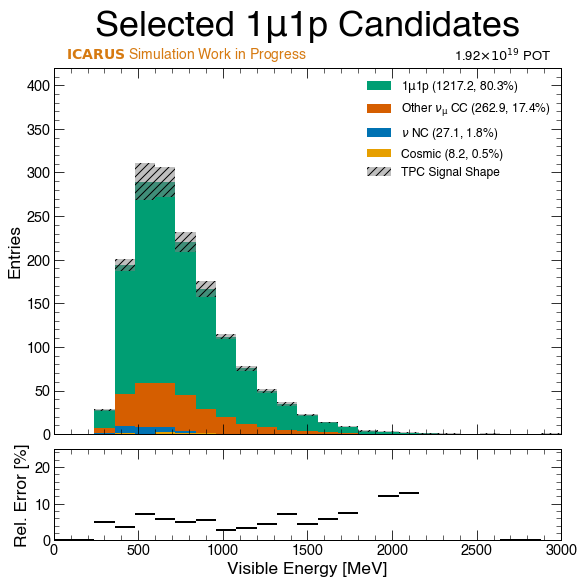

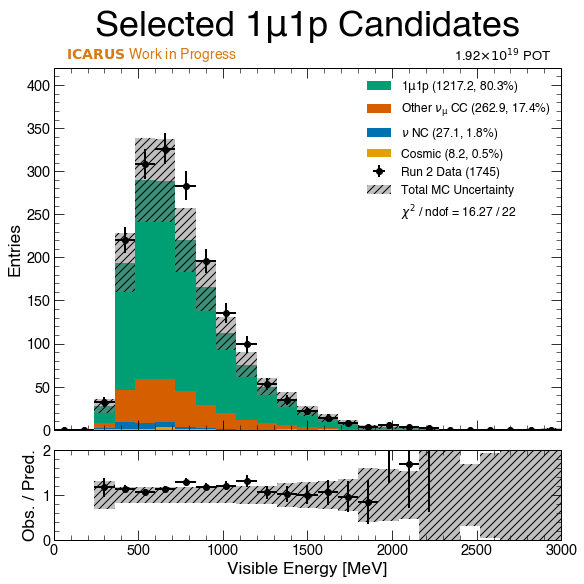

In [7]:
plots = {f'{plot_name}_{var_name}': dict(**plot_cfg, **var_cfg) for plot_name, plot_cfg in cfg['plots'].items() for var_name, var_cfg in cfg['variables'].items()}

channel = '1mu1p'
var = 'visible_energy'
dir = 'reco'

plots[f'systematics_hist1d_{channel}_{var}']['systematic'] = ['tpcuntunedsigshape', 'TPC Signal Shape']
#plots[f'systematics_hist1d_{channel}_{var}']['systematic'] = ['flux', 'Flux Uncertainties']
plot_histogram(data, plots[f'systematics_hist1d_{channel}_{var}'], cfg['exposure'], dir=dir, release=None)

plot_histogram(data, plots[f'datamc_hist1d_{channel}_{var}'], cfg['exposure'], dir=dir, release=None)

In [4]:
from analysis import calculate_full_pureff
calculate_full_pureff(data, cfg['table_purity_efficiency'], write='/Users/mueller/Downloads/pureff.tex')

In [8]:
from analysis import print_statistics

print_statistics(data, cfg['systematics']['detector'], cfg['exposure'], write='/Users/mueller/Downloads/table_detector_systematics.tex')